In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv(r'C:\Users\lilie\OneDrive\Bureau\ironHack\dataset\fake_real_final.csv')

In [5]:
df

,title,text,label_REAL,subject,date
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,NaN,NaN
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,NaN,NaN
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,NaN,NaN
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,NaN,NaN
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,NaN,NaN
...,...,...,...,...,...
50990,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1,worldnews,08-22-2017-
50991,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1,worldnews,08-22-2017-
50992,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1,worldnews,08-22-2017-
50993,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1,worldnews,08-22-2017-


In [8]:
df.label_REAL.value_counts(normalize=True)

0    0.522208
1    0.477792
Name: label_REAL, dtype: float64

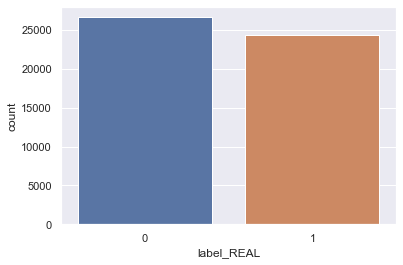

In [11]:
sns.countplot(df.label_REAL)

In [6]:
df['txt'] = df['title'] + " " + df['text']
df = df.drop(columns = ['title', 'text','subject','date'])
df = df.loc[~df['txt'].isna()]
df.head()

,label_REAL,txt
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...


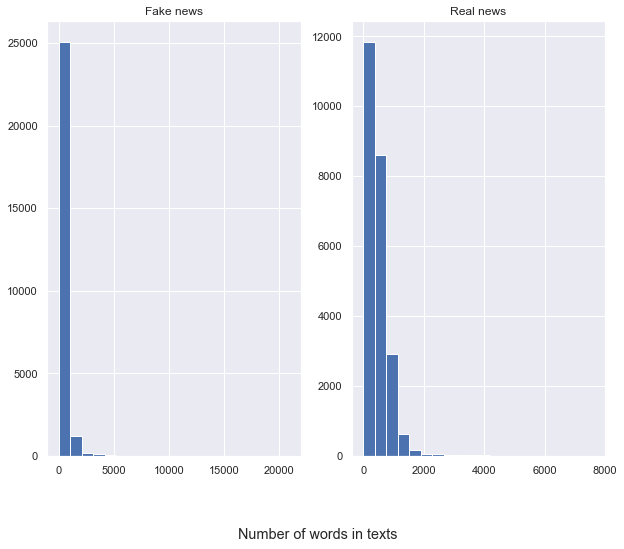

In [250]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

text_len = df[df.label_REAL==0]['txt'].str.split().map(lambda x: len(x))
ax1.hist(text_len, bins = 20)
ax1.set_title('Fake news')

text_len = df[df.label_REAL==1]['txt'].str.split().map(lambda x: len(x))
ax2.hist(text_len, bins = 20)
ax2.set_title('Real news')

fig.suptitle('Number of words in texts', y=0)
fig.show()

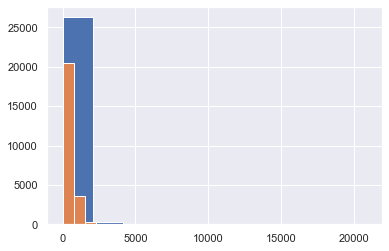

In [253]:
df[df.label_REAL==0]['txt'].str.split().map(lambda x: len(x)).hist() #blue
df[df.label_REAL==1]['txt'].str.split().map(lambda x: len(x)).hist() #orange

# Split train-test

In [7]:
X = df.txt
y = df.label_REAL
X.head()

0    You Can Smell Hillary’s Fear Daniel Greenfield...
1    Watch The Exact Moment Paul Ryan Committed Pol...
2    Kerry to go to Paris in gesture of sympathy U....
3    Bernie supporters on Twitter erupt in anger ag...
4    The Battle of New York: Why This Primary Matte...
Name: txt, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Preprocessing - 1st approach (tfidf)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
### tf-idf
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)

X_tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test = tfidf_vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

# Preprocessing - 2nd approach (tfidf n-grams=1,3)

In [8]:
### tf-idf with n-grams
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(1, 3),stop_words='english', max_df=0.7)

X_tfidf_train2 = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test2 = tfidf_vectorizer.transform(X_test)

# Modelling

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

## passiveAggressive 

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier

### 1. tf-idf

In [19]:
clf = PassiveAggressiveClassifier(n_iter_no_change=100)
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)

cm = confusion_matrix(y_test, y_pred)
display(cm)
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7823,  165],
       [ 172, 7139]], dtype=int64)

Accuracy is 0.978
Precision is 0.9774
Recall is 0.9765
F1 is 0.9769


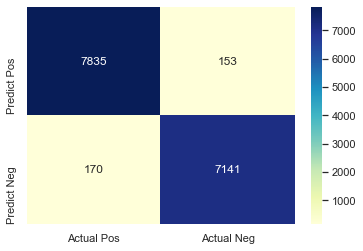

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams 

In [259]:
clf = PassiveAggressiveClassifier(n_iter_no_change=50)
clf.fit(X_tfidf_train2, y_train)
y_pred2 = clf.predict(X_tfidf_test2)

display(cm)
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7337,  651],
       [ 792, 6519]], dtype=int64)

Accuracy is 0.9722
Precision is 0.9755
Recall is 0.9659
F1 is 0.9707


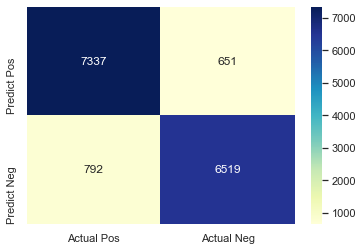

In [164]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

### 1. tf-idf

In [260]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_tfidf_train, y_train)
y_pred=dtc.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.951
Precision is 0.9573
Recall is 0.9393
F1 is 0.9482


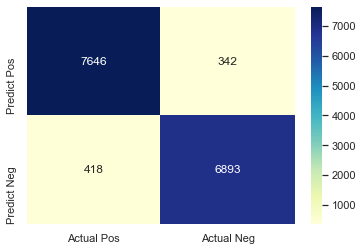

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams

In [261]:
dtc.fit(X_tfidf_train2, y_train)
y_pred2=dtc.predict(X_tfidf_test2)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.951
Precision is 0.9573
Recall is 0.9393
F1 is 0.9482


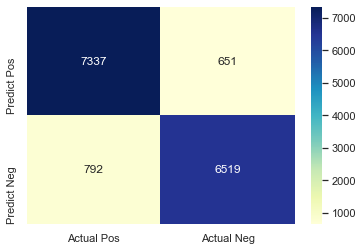

In [167]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

### 1. tf-idf

In [262]:
classifier=MultinomialNB()
classifier.fit(X_tfidf_train, y_train)
y_pred = classifier.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9057
Precision is 0.9092
Recall is 0.8917
F1 is 0.9004


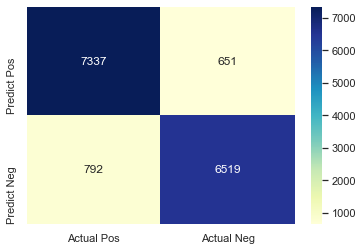

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams

In [263]:
classifier=MultinomialNB()
classifier.fit(X_tfidf_train2, y_train)
y_pred2 = classifier.predict(X_tfidf_test2)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9057
Precision is 0.9092
Recall is 0.8917
F1 is 0.9004


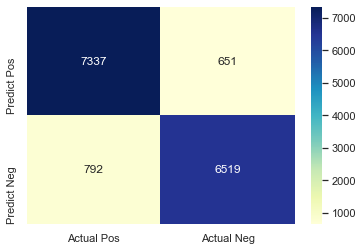

In [169]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier()
rf.fit(X_tfidf_train,y_train)
y_pred = rf.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9645
Precision is 0.9717
Recall is 0.9535
F1 is 0.9625


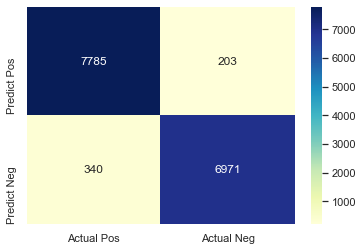

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# SVM (too long)

In [21]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC(kernel = 'linear')
SVMClassifier = SVM.fit(X_tfidf_train, y_train)
y_pred = SVMClassifier.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

# SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
SGD = SGDClassifier(loss = 'modified_huber')
SGDC = SGD.fit(X_tfidf_train, y_train)
y_pred = SGDC.predict(X_tfidf_test)

In [25]:
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9759
Precision is 0.9763
Recall is 0.9733
F1 is 0.9748


## TFIDF and PassiveAggressive classifier features selection

In [22]:
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test = tfidf_vectorizer.transform(X_test)

clf = PassiveAggressiveClassifier(n_iter_no_change=100)
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)

display(confusion_matrix(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred).round(4))

array([[7830,  158],
       [ 166, 7145]], dtype=int64)

Precision is 0.9784


In [30]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')
X_tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train) 
X_tfidf_test2 = tfidf_vectorizer2.transform(X_test)

clf.fit(X_tfidf_train2, y_train)
y_pred2 = clf.predict(X_tfidf_test2)

display(confusion_matrix(y_test, y_pred2))
print('Precision is', precision_score(y_test, y_pred2).round(4))

array([[7805,  183],
       [ 228, 7083]], dtype=int64)

Precision is 0.9748


In [31]:
tfidf_vectorizer3 = TfidfVectorizer(strip_accents=ascii, stop_words='english')
X_tfidf_train3 = tfidf_vectorizer3.fit_transform(X_train) 
X_tfidf_test3 = tfidf_vectorizer3.transform(X_test)

clf.fit(X_tfidf_train3, y_train)
y_pred3 = clf.predict(X_tfidf_test3)

display(confusion_matrix(y_test, y_pred3))
print('Precision is', precision_score(y_test, y_pred3).round(4))

array([[7831,  157],
       [ 168, 7143]], dtype=int64)

Precision is 0.9785


In [33]:
tfidf_vectorizer5 = TfidfVectorizer(strip_accents=ascii, stop_words='english', min_df=0.1, max_df=0.9)
X_tfidf_train5 = tfidf_vectorizer5.fit_transform(X_train) 
X_tfidf_test5 = tfidf_vectorizer5.transform(X_test)

clf.fit(X_tfidf_train5, y_train)
y_pred5 = clf.predict(X_tfidf_test5)

display(confusion_matrix(y_test, y_pred5))
print('Precision is', precision_score(y_test, y_pred5).round(4))

array([[7446,  542],
       [ 390, 6921]], dtype=int64)

Precision is 0.9274


### Best prediction

In [39]:
tfidf_vectorizer4 = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.9)
X_tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train) 
X_tfidf_test4 = tfidf_vectorizer4.transform(X_test)

clf.fit(X_tfidf_train4, y_train)
y_pred4 = clf.predict(X_tfidf_test4)

display(confusion_matrix(y_test, y_pred4))
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7831,  157],
       [ 162, 7149]], dtype=int64)

Accuracy is 0.9788
Precision is 0.9784
Recall is 0.9773
F1 is 0.9778


In [44]:
tfidf_vectorizer4.vocabulary_.items()

dict_items([('dallas', 30220), ('maidan', 66949), ('staged', 107263), ('snipers', 105469), ('designed', 32471), ('inflict', 54805), ('u2018strategy', 119086), ('tension', 111794), ('u2019', 119433), ('daily', 30160), ('shooter', 103505), ('21st', 3825), ('century', 23293), ('wirelast', 135302), ('night', 78116), ('highly', 50931), ('emotive', 37637), ('politicized', 89429), ('gladio', 46137), ('style', 108756), ('event', 39231), ('unfolded', 129802), ('america', 10775), ('similar', 104226), ('events', 39234), ('recorded', 94836), ('recent', 94660), ('history', 51278), ('followed', 42754), ('similarly', 104229), ('predictable', 90436), ('political', 89410), ('fall', 40479), ('outs', 84911), ('effects', 36750), ('general', 45271), ('public', 91903), ('slow', 105093), ('grasp', 47270), ('really', 94397), ('happening', 49237), ('eyes', 40059), ('falls', 40504), ('pattern', 86683), ('high', 50913), ('profile', 91213), ('sniper', 105468), ('attacks', 13599), ('stage', 107260), ('false', 4051

In [40]:
tfidf_vectorizer4.get_feature_names()

['00',
 '000',
 '0000',
 '00000017',
 '00000031',
 '000035',
 '00004',
 '000048',
 '00006',
 '00007',
 '0001',
 '0001pt',
 '0002',
 '0009',
 '000a',
 '000after',
 '000although',
 '000california',
 '000cylvia',
 '000dillon000',
 '000ecuador',
 '000florida',
 '000ft',
 '000georgia',
 '000illegal',
 '000illinois',
 '000in',
 '000jose',
 '000km',
 '000kyrgyzstan',
 '000m',
 '000michigan',
 '000new',
 '000oman',
 '000s',
 '000saudi',
 '000south',
 '000th',
 '000the',
 '000uterine',
 '000x',
 '001',
 '00106',
 '0011',
 '00155',
 '0018',
 '001romney',
 '001st',
 '002',
 '0020',
 '00240',
 '002singapore',
 '003',
 '004',
 '0045',
 '00458',
 '004saint',
 '005',
 '0050',
 '005380',
 '005930',
 '005s',
 '006',
 '00654',
 '00684',
 '006s',
 '007',
 '0075',
 '0076',
 '007kzman',
 '007s',
 '008',
 '00867',
 '008s',
 '009',
 '00am',
 '00c6j7capuhttps',
 '00hex',
 '00pm',
 '00pme',
 '00yecahb4d',
 '01',
 '010',
 '0100',
 '0109',
 '011',
 '0111',
 '0112',
 '012',
 '01233',
 '0129',
 '013',
 '0130',
 '0

# Tf-idf for Real news

In [10]:
df_real = df.loc[df.label_REAL==1]
df_real.shape

(24365, 2)

In [11]:
df_fake = df.loc[df.label_REAL==0]
df_fake.shape

(26630, 2)

In [16]:
tfidf_real = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)
X_tfidf_real_train = tfidf_real.fit_transform(X_train) 
X_tfidf_real_test = tfidf_real.transform(X_test)

In [ ]:
clf.fit(X_tfidf_train4, y_train)
y_pred4 = clf.predict(X_tfidf_test4)

In [14]:
tfidf_real.vocabulary_

AttributeError: 'TfidfVectorizer' object has no attribute 'vocabulary_'

In [9]:
from pycaret.nlp import *

In [12]:
df_sample = df.head(20).copy()
df_sample

,label_REAL,txt
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...
5,0,"Tehran, USA \nI’m not an immigrant, but my g..."
6,0,Girl Horrified At What She Watches Boyfriend D...
7,1,‘Britain’s Schindler’ Dies at 106 A Czech stoc...
8,1,Fact check: Trump and Clinton at the 'commande...
9,1,Iran reportedly makes new push for uranium con...


In [14]:
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)

tfidf = tfidf_vectorizer.fit_transform(df_sample['txt']) 

In [15]:
nlp = setup(data=df_sample, target ='txt', session_id=123)

INFO:logs:PyCaret NLP Module
INFO:logs:version 2.3.0
INFO:logs:Initializing setup()
INFO:logs:USI: f566
INFO:logs:setup(data=(20, 2), target=txt, custom_stopwords=None, html=True, session_id=123, log_experiment=False,
                    experiment_name=None, log_plots=False, log_data=False, verbose=True)
INFO:logs:Checking environment
INFO:logs:python_version: 3.8.3
INFO:logs:python_build: ('default', 'Jul  2 2020 17:30:36')
INFO:logs:machine: AMD64
INFO:logs:platform: Windows-10-10.0.19041-SP0
INFO:logs:Memory: svmem(total=4157509632, available=693579776, percent=83.3, used=3463929856, free=693579776)
INFO:logs:Physical Core: 2
INFO:logs:Logical Core: 4
INFO:logs:Checking libraries
INFO:logs:pd==1.2.3
INFO:logs:numpy==1.19.5
INFO:logs:gensim==4.0.1
INFO:logs:spacy==2.3.5
INFO:logs:nltk==3.5
INFO:logs:textblob==0.15.3
INFO:logs:pyLDAvis==3.3.1
INFO:logs:wordcloud==1.8.1
INFO:logs:mlflow==1.15.0
INFO:logs:Checking Exceptions
ERROR:root:Internal Python error in the inspect module.
Below

Traceback (most recent call last):
  File "C:\Users\lilie\AppData\Roaming\Python\Python38\site-packages\pycaret\nlp.py", line 313, in setup
    sp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  File "C:\Users\lilie\AppData\Roaming\Python\Python38\site-packages\spacy\__init__.py", line 30, in load
    return util.load_model(name, **overrides)
  File "C:\Users\lilie\AppData\Roaming\Python\Python38\site-packages\spacy\util.py", line 175, in load_model
    raise IOError(Errors.E050.format(name=name))
OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lilie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-2bbfb955ca81>", line 1, in <module>
    nlp = s

TypeError: object of type 'NoneType' has no len()

In [ ]:
# create a model
lda = create_model('lda', multi_core = True)
# label the data using trained model
lda_df = assign_model(lda)

In [ ]:
lda_df.head()

In [ ]:
plot_model(lda)

In [ ]:
evaluate_model(lda)

In [ ]:
tuned_lda = tune_model(model = 'lda', supervised_target = 'status')

In [ ]:
save_model(lda, 'lda_model_23122019')

In [ ]:
model = setup(data = lda_df, target = 'label_REAL', ignore_features=['txt','Dominant_Topic','Perc_Dominant_Topic'])

In [ ]:
compare_models()